# MINERÍA DE DATOS

# Avance II PIA

## Equipo 01 Grupo 002 Mié 7-10pm

* 1823604 Arvizu Rivera, Patricia Sarahí
* 1725370 Carrillo Soto, Helena Patricia
* 1807864 Puente González, Keila Rubi

## *CO2_GHG_emissions-data* 
Para realizar nuestra investigación, usaremos la base de datos CO2_GHG_emissions-data obtenida
de:
https://www.kaggle.com/yoannboyere/co2-ghg-emissionsdata


**Justificación**

Nuestra motivación es generar conciencia en las personas sobre las emisiones de CO2 y gases de
efecto invernadero y así poder contribuir a frenar el calentamiento global.


Consideramos beneficioso analizar las emisiones y cómo han aumentado (o cambiado) a lo largo del
tiempo, haciendo énfasis en los años tras eventos como el Protocolo de Kioto. La base de datos
obtenida nos proporciona esta información desde 1750 para algunos países, 10 años antes de la
Revolución Industrial. Analizando estos aspectos podemos evitar repetir comportamientos que nos
perjudican y así como averiguar sobre alternativas que se pueden considerar ante las acciones que
se están llevando a cabo y que estén generando una gran emisión de CO2 y GHG.


Como estudiantes de actuaría, uno de los aspectos que estudiamos son las Series de Tiempo;
consideramos que desde las técnicas de predicción y nuestros conocimientos matemáticos en
general podemos ayudar al medio ambiente.

**Objetivos**

Nuestro objetivo principal es determinar el impacto que el Protocolo de Kioto tuvo sobre la emisión
de los gases de efecto invernadero durante sus dos periodos de vigencia. Relacionar las emisiones
de los países antes y después de que entraran al protocolo y verificar si las emisiones se redujeron.
Como objetivos secundarios buscamos identificar los países que emiten mayor volumen de gases
de efecto invernadero. Identificar si los países con mayores emisiones son precisamente aquellos
que no están dentro del Protocolo de Kioto y además identificar a los países que realizan menos emisiones de CO2.

## *Preparación de datos*

**Descripción de datos**

Importación de librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib as plt
import matplotlib.pyplot as plt1
import seaborn as sns

Lectura de datos. Previamente sabíamos que los datos nulos estaban con 0, por lo que a los valores con 0 los identificaremos como nulos.

In [2]:
df = pd.read_csv("C:/Users/sophi/Downloads/co2_emission.csv",encoding='utf8', na_values=0)

Los datos presentes en la base son una tabla y contiene el volumen de las emisiones de dióxido de
carbono (CO2) y gases de efecto invernadero (GHG) de distintos países desde 1750 hasta 2017.

El dataframe consta de 4 columnas:
* Entity: Objeto. Esta columna contiene el nombre de los países (texto) con una entrada para cada año, lo que quiere decir que se destinarán varias filas para cada país según los años registrados de este.
* Code: Objeto. Código ISO (texto), el cual es un código normalizado creado para los nombres de los países.
* Year: Entero. Año de la emisión (tiempo).
* Annual C02 emissions: Flotante. Emisiones anuales de CO2 medidas en toneladas (medición).


Revisando el tamaño de la base de datos:

In [3]:
df.shape    

(20853, 4)

Consta de 20,853 filas y 4 columnas.

Revisando el nombre de las columnas:

In [4]:
list(df.columns)

['Entity', 'Code', 'Year', 'Annual CO₂ emissions (tonnes )']

Tipo de datos que tenemos en las columnas:

In [5]:
df.dtypes

Entity                             object
Code                               object
Year                                int64
Annual CO₂ emissions (tonnes )    float64
dtype: object

**Visualización de datos.**

Utilizamos .head para la visualización de los títulos de las columnas y las primeras 5 filas

In [6]:
df.head() 

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0




El nombre de la columna 4 es complicado por el subíndice de CO2, lo cambiaremos a "CO2emissions" para hacerlo más simple. Duplicaremos nuestros datos en "data_frame" para mantener los originales. Consideramos que el orden de las columnas está bien para lo que trabajaremos y no se necesita agregar o quitar alguna.

In [7]:
data_frame=df

In [8]:
data_frame=data_frame.rename(columns = {'Annual CO₂ emissions (tonnes )':'CO2emissions'})

Queremos saber cuántos países diferentes tenemos:

In [9]:
len(list(data_frame.Entity.unique()))

233

**Manejo de datos nulos**

Verificando si tenemos datos nulos en alguna columna:

In [10]:
data_frame.isnull().any()

Entity          False
Code             True
Year            False
CO2emissions     True
dtype: bool

Saber cuántos datos nulos son:

In [11]:
data_frame.isnull().sum()

Entity             0
Code            2207
Year               0
CO2emissions    1289
dtype: int64

Queremos saber qué países tienen código nulo y asignales uno.

In [12]:
nulos=data_frame[data_frame.Code.isnull()]

In [13]:
list(nulos.Entity.unique())

['Africa',
 'Americas (other)',
 'Antarctic Fisheries',
 'Asia and Pacific (other)',
 'EU-28',
 'Europe (other)',
 'International transport',
 'Kyrgysztan',
 'Middle East',
 'Statistical differences',
 'Wallis and Futuna Islands']

In [14]:
data_frame.loc[data_frame['Entity'] == 'Africa', 'Code'] = 'AFR'
data_frame.loc[data_frame['Entity'] == 'Americas (other)', 'Code'] = 'AME'
data_frame.loc[data_frame['Entity'] == 'Antarctic Fisheries', 'Code'] = 'ANF'
data_frame.loc[data_frame['Entity'] == 'Asia and Pacific (other)', 'Code'] = 'AAP'
data_frame.loc[data_frame['Entity'] == 'EU-28', 'Code'] = 'E28'
data_frame.loc[data_frame['Entity'] == 'Europe (other)', 'Code'] = 'EUO'
data_frame.loc[data_frame['Entity'] == 'International transport', 'Code'] = 'INT'
data_frame.loc[data_frame['Entity'] == 'Kyrgysztan', 'Code'] = 'KYR'
data_frame.loc[data_frame['Entity'] == 'Middle East', 'Code'] = 'MIE'
data_frame.loc[data_frame['Entity'] == 'Statistical differences', 'Code'] = 'STD'
data_frame.loc[data_frame['Entity'] == 'Wallis and Futuna Islands', 'Code'] = 'WFI'
#https://es.stackoverflow.com/questions/231231/remplazar-valores-de-un-data-frame-con-otros-python

Queremos ver ahora si ya no hay "Code" nulos.

In [15]:
data_frame.isnull().sum()

Entity             0
Code               0
Year               0
CO2emissions    1289
dtype: int64

Dado que la suma en "Code" nos dio igual a cero significa que ya no tenemos "Code" nulos.

Duplicamos nuevamente nuestros datos en "df_drop" que será nuestro data frame sin datos nulos.

In [16]:
df_drop = data_frame.dropna()

Verificamos que sí se hayan eliminado los datos nulos:

In [17]:
df_drop.shape  

(19564, 4)

In [18]:
df_drop.isnull().any()

Entity          False
Code            False
Year            False
CO2emissions    False
dtype: bool

Como nos regresó "Falso" en todas las columnas significa que no tenemos datos nulos.

In [19]:
df_drop.isnull().sum()

Entity          0
Code            0
Year            0
CO2emissions    0
dtype: int64

Dado que la suma en todas las columnas nos dio igual a cero significa que ya no tenemos datos nulos.

Vemos cuántos países quedaron en el data frame después de eliminar los datos nulos. 

In [20]:
len(list(df_drop.Entity.unique()))

232

No tenemos datos de todos los países para todos los años, así que graficaremos para saber a partir de qué año comenzamos a tener más datos.

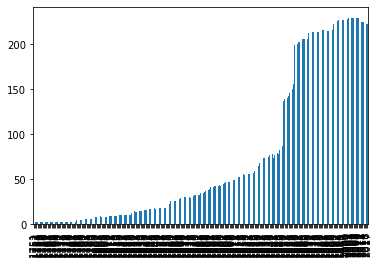

In [21]:
df_drop['Year'].value_counts().sort_index().plot.bar()

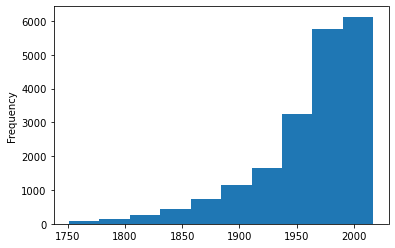

In [22]:
df_drop['Year'].plot.hist()

Vemos que a partir de 1950 hay más datos. Haremos nuevamente un histograma sólo para los años que son mayor o igual a 1950.

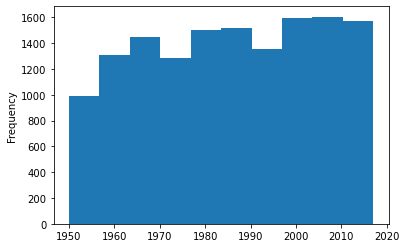

In [23]:
df_drop[df_drop['Year']>=1950]['Year'].plot.hist()

Hacemos una gráfica de barras para los años mayores o iguales a 1950.

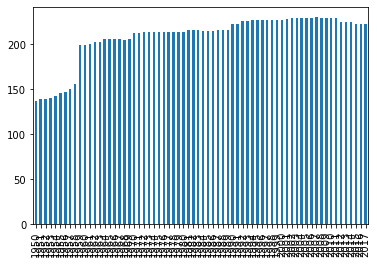

In [24]:
df_drop[df_drop['Year']>=1950]['Year'].value_counts().sort_index().plot.bar()

Todavía en los primeros años hay alrededor de 50 países que faltan, verificaremos ahora con los años que son mayores o iguales a 1960, ya que en el último histograma es en donde los datos por año aumentan.

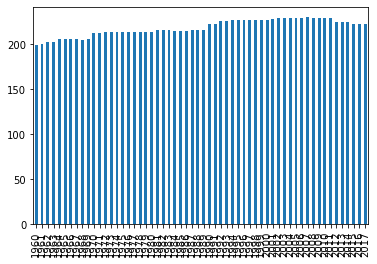

In [25]:
df_drop[df_drop['Year']>=1960]['Year'].value_counts().sort_index().plot.bar()

Aquí ya se ve muy similar la cantidad de países de los que se tienen datos. Por lo que para nuestra base de datos final usaremos la que no tiene datos nulos y además los datos de la columna "Year" son mayor o igual a 1960.

In [26]:
dataframe=df_drop[df_drop['Year']>=1960]

Verificamos la cantidad de datos total que tenemos en nuestra base de datos a utilizar.

In [27]:
dataframe.shape  

(12677, 4)

In [28]:
len(list(dataframe.Entity.unique()))

232

Finalmente creamos un archivo .csv con el dataframe que usaremos.

In [29]:
dataframe.to_csv('C:/Users/sophi/Downloads/df_co2emissions.csv', index=False)

En resumen, tendremos 232 entidades con medición de CO2 emitido (en toneladas) a partir de 1960 que en total nos dan 12,677 datos.


## *Análisis estadístico*

In [30]:
df = pd.read_csv("C:/Users/sophi/Downloads/df_co2emissions.csv",encoding='utf8', na_values=0)

Como desde nuestro dataframe tenemos la emisión global por año, usaremos funciones de estadística básica sólo para estos datos, creando un nuevo dataframe sólo para entity=World

In [31]:
dataframe=df[df['Entity']=='World']

Nuestra columna más importante es la de CO2emissions, usaremos algunas funciones para entender mejor cómo se ha comportado la emisión de gases. Primero usaremos .describe() ya que nos da la cantidad de valores no nulos, la media, la varianza, el valor mínimo, los cuartiles y el valor máximo.

In [32]:
dataframe['CO2emissions'].describe()

count    5.800000e+01
mean     2.203288e+10
std      7.660097e+09
min      9.410530e+09
25%      1.690092e+10
50%      2.191713e+10
75%      2.652360e+10
max      3.615326e+10
Name: CO2emissions, dtype: float64

De aquí, vemos que son 58 datos y que sí tienen un varianza grande. Esto lo relacionamos con que la emisión de CO2 en el mundo ha aumentado de manera desacelerada.

In [33]:
dataframe.corr()

,Year,CO2emissions
Year,1.000000,0.983244
CO2emissions,0.983244,1.000000


Al tener la correlación números muy cercanos a 1 podemos concluir que existe una relación lineal muy grande entre las emisiones y el año en que se hicieron.


Ahora revisaremos estadísticas por país centrándonos en el año 2017, para ello es necesario eliminar primero a las entidades que no son países y a las que pertenecen a la Unión Europea, ya que se estará evaluando como un conjunto:

In [52]:
paises= df.drop(df[df['Entity']=='World'].index)
paises= paises.drop(paises[paises['Entity']=='Austria'].index)
paises= paises.drop(paises[paises['Entity']=='Belgium'].index)
paises= paises.drop(paises[paises['Entity']=='Bulgaria'].index)
paises= paises.drop(paises[paises['Entity']=='Cyprus'].index)
paises= paises.drop(paises[paises['Entity']=='Denmark'].index)
paises= paises.drop(paises[paises['Entity']=='Estonia'].index)
paises= paises.drop(paises[paises['Entity']=='Finland'].index)
paises= paises.drop(paises[paises['Entity']=='France'].index)
paises= paises.drop(paises[paises['Entity']=='Germany'].index)
paises= paises.drop(paises[paises['Entity']=='Greece'].index)
paises= paises.drop(paises[paises['Entity']=='Hungary'].index)
paises= paises.drop(paises[paises['Entity']=='Ireland'].index)
paises= paises.drop(paises[paises['Entity']=='Italy'].index)
paises= paises.drop(paises[paises['Entity']=='Latvia'].index)
paises= paises.drop(paises[paises['Entity']=='Lithuania'].index)
paises= paises.drop(paises[paises['Entity']=='Luxembourg'].index)
paises= paises.drop(paises[paises['Entity']=='Malta'].index)
paises= paises.drop(paises[paises['Entity']=='Netherlands'].index)
paises= paises.drop(paises[paises['Entity']=='Poland'].index)
paises= paises.drop(paises[paises['Entity']=='Portugal'].index)
paises= paises.drop(paises[paises['Entity']=='Romania'].index)
paises= paises.drop(paises[paises['Entity']=='Slovakia'].index)
paises= paises.drop(paises[paises['Entity']=='Slovenia'].index)
paises= paises.drop(paises[paises['Entity']=='Spain'].index)
paises= paises.drop(paises[paises['Entity']=='Sweden'].index)
paises= paises.drop(paises[paises['Entity']=='International transport'].index)
paises= paises.drop(paises[paises['Entity']=='Statistical differences'].index)
paises= paises.drop(paises[paises['Entity']=='Africa'].index)
#https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

In [53]:
pa17=paises[paises['Year']==2017]

In [54]:
pa17.describe()

,Year,CO2emissions
count,193.0,1.930000e+02
mean,2017.0,2.463309e+08
std,0.0,9.759886e+08
min,2017.0,1.169579e+04
25%,2017.0,1.024740e+06
50%,2017.0,7.687196e+06
75%,2017.0,6.272530e+07
max,2017.0,9.838754e+09


Para saber cuáles son los países que tienen mayor y menor grado de contaminación los ordenamos de manera descendente:

In [55]:
pa17_sort=pa17.sort_values(by=['CO2emissions'], ascending= False)

In [56]:
pa17_sort

,Entity,Code,Year,CO2emissions
2540,China,CHN,2017,9.838754e+09
12149,United States,USA,2017,5.269530e+09
714,Asia and Pacific (other),AAP,2017,5.071156e+09
3563,EU-28,E28,2017,3.543683e+09
7619,Middle East,MIE,2017,2.671943e+09
...,...,...,...,...
7817,Montserrat,MSR,2017,5.068175e+04
12444,Wallis and Futuna Islands,WFI,2017,2.590908e+04
11859,Tuvalu,TUV,2017,1.295454e+04
8526,Niue,NIU,2017,1.295454e+04


## *Análisis gráfico de las emisiones de CO2*

**Análisis de las emisiones de CO2 por país**

Para observar el top de emisión por países evaluamos cuatro años clave en el Protocolo de Kioto:
* 1997: Año en el que se firmó el acuerdo
* 2005: Año en que comenzó la vigencia
* 2012: Año en que se renovó su validez (pero Estados Unidos y China salieron del acuerdo)
* 2017: Año más reciente del que se tienen registros

In [72]:
PA17=pa17_sort[0:6]
PA172 = pa17_sort[6:]
PA172_Sum= PA172['CO2emissions'].sum()
PA17 = PA17.append({'Entity':'others','Code':'OTH','Year': 2017,'CO2emissions':PA172_Sum},ignore_index=True)
PA17

,Entity,Code,Year,CO2emissions
0,China,CHN,2017,9.838754e+09
1,United States,USA,2017,5.269530e+09
2,Asia and Pacific (other),AAP,2017,5.071156e+09
3,EU-28,E28,2017,3.543683e+09
4,Middle East,MIE,2017,2.671943e+09
5,India,IND,2017,2.466765e+09
6,others,OTH,2017,1.868003e+10


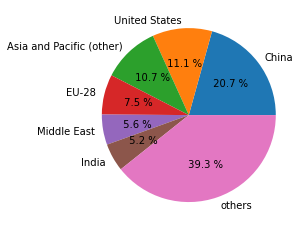

In [62]:
plt1.pie(PA17['CO2emissions'], labels= PA17['Entity'], autopct = " %0.1f %% ")
plt1.show()

Podemos observar que en el año 2017 seis entidades emitieron más del 60% del CO2, siendo China quien emitió aproximadamente una quinta parte del total con un 20.7%

In [73]:
pa12=paises[paises['Year']==2012]
pa12_sort=pa12.sort_values(by=['CO2emissions'], ascending= False)
PA12=pa12_sort[0:6]
PA122 = pa12_sort[6:]
PA122_Sum= PA122['CO2emissions'].sum()
PA12 = PA12.append({'Entity':'others','Code':'OTH','Year': 2012,'CO2emissions':PA122_Sum},ignore_index=True)
PA12

,Entity,Code,Year,CO2emissions
0,China,CHN,2012,9.633899e+09
1,United States,USA,2012,5.366730e+09
2,Asia and Pacific (other),AAP,2012,4.881674e+09
3,EU-28,E28,2012,3.747241e+09
4,Americas (other),AME,2012,2.375406e+09
5,Middle East,MIE,2012,2.308105e+09
6,others,OTH,2012,1.793843e+10


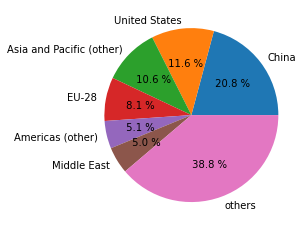

In [71]:
plt1.pie(PA12['CO2emissions'], labels= PA12['Entity'], autopct = " %0.1f %% ")
plt1.show()

En el año 2012 se observa una similitud al año 2017, donde China tiene el primer puesto en mayor emisión de CO2, acaparando aproximadamente una quinta parte del total.

In [74]:
pa05=paises[paises['Year']==2005]
pa05_sort=pa05.sort_values(by=['CO2emissions'], ascending= False)
PA05=pa05_sort[0:6]
PA052 = pa05_sort[6:]
PA052_Sum= PA052['CO2emissions'].sum()
PA05 = PA05.append({'Entity':'others','Code':'OTH','Year': 2005,'CO2emissions':PA052_Sum},ignore_index=True)
PA05

,Entity,Code,Year,CO2emissions
0,United States,USA,2005,6.132006e+09
1,China,CHN,2005,5.771168e+09
2,EU-28,E28,2005,4.314640e+09
3,Asia and Pacific (other),AAP,2005,4.138394e+09
4,Europe (other),EUO,2005,2.146674e+09
5,Americas (other),AME,2005,2.076950e+09
6,others,OTH,2005,1.471370e+10


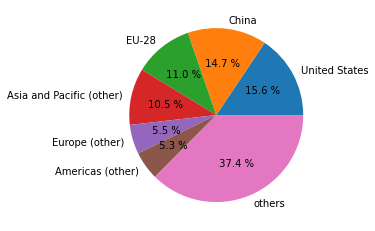

In [68]:
plt1.pie(PA05['CO2emissions'], labels= PA05['Entity'], autopct = " %0.1f %% ")
plt1.show()

Podemos observar que en el año 2005 quien más emisiones de CO2 tenía era Estados Unidos y no China, con un 15.6%, además la India no formaba parte del "Top 6", lo cual puede deberse a la explosión demográfica.

In [75]:
pa97=paises[paises['Year']==1997]
pa97_sort=pa97.sort_values(by=['CO2emissions'], ascending= False)
PA97=pa97_sort[0:6]
PA972 = pa97_sort[6:]
PA972_Sum= PA972['CO2emissions'].sum()
PA97 = PA97.append({'Entity':'others','Code':'OTH','Year': 1997,'CO2emissions':PA972_Sum},ignore_index=True)
PA97

,Entity,Code,Year,CO2emissions
0,United States,USA,1997,5.703891e+09
1,EU-28,E28,1997,4.235932e+09
2,Asia and Pacific (other),AAP,1997,3.557848e+09
3,China,CHN,1997,3.414549e+09
4,Europe (other),EUO,1997,2.072333e+09
5,Americas (other),AME,1997,1.766940e+09
6,others,OTH,1997,1.197053e+10


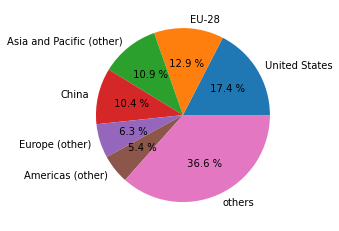

In [76]:
plt1.pie(PA97['CO2emissions'], labels= PA97['Entity'], autopct = " %0.1f %% ")
plt1.show()

En el año de 1997 cuando se firmó el Protocolo de Kioto, Estados Unidos y la Unión Europea eran quienes contaminaban más, lo que muestra por qué eran entidades de interés para este protocolo.

Revisamos brevemente cuales son las entidades que menos contaminan y sus respectivas emisiones a los años de 1997 y 2017, para ver si se dio alguna variación durante dichos años.

In [86]:
pa97_s=pa97.sort_values(by=['CO2emissions'])[0:6]
pa97_s

,Entity,Code,Year,CO2emissions
414,Antarctic Fisheries,ANF,1997,3664.0
8506,Niue,NIU,1997,7328.0
11839,Tuvalu,TUV,1997,7328.0
9551,Saint Helena,SHN,1997,10992.0
6278,Kiribati,KIR,1997,25648.0
7797,Montserrat,MSR,1997,32976.0


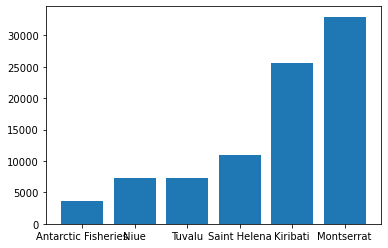

In [89]:
plt1.bar(pa97_s['Entity'], pa97_s['CO2emissions'])
plt1.show()

El país que menos contaminaba en 1997 era Antarctic Fisheries, su emisión era menor a 5,000 toneladas de CO2 y las emisiones de los países que se encuentran en esta lista apenas y rebasaban las 30,000 toneladas.

In [87]:
pa17_s=pa17.sort_values(by=['CO2emissions'])[0:6]
pa17_s

,Entity,Code,Year,CO2emissions
9571,Saint Helena,SHN,2017,11695.79
8526,Niue,NIU,2017,12954.54
11859,Tuvalu,TUV,2017,12954.54
12444,Wallis and Futuna Islands,WFI,2017,25909.08
7817,Montserrat,MSR,2017,50681.75
8072,Nauru,NRU,2017,56136.33


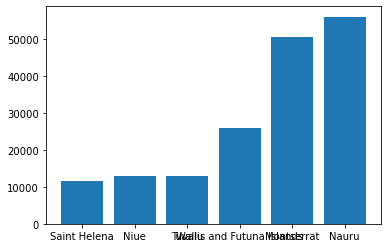

In [90]:
plt1.bar(pa17_s['Entity'], pa17_s['CO2emissions'])
plt1.show()

En el año 2017 la entidad que menos contaminaba era Santa Helena con una cantidad poco mayor a las 10,000 toneladas. Mientras que los primeros países de esta lista cumplen con la caracteristica anterior de no emitir más de 30,000 tonelada, el número 5 y 6 emiten más de 50,000 lo que nos indica un aumento general de las emisiones de gases de efecto invernadero, es decir se dió a un nivel global y no sólo en algunos países. 

**Análisis las emisiones de CO2 a nivel global a lo largo de los años.**

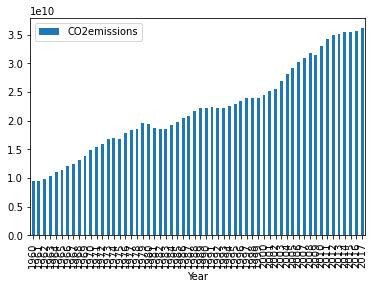

In [77]:
dataframe.plot.bar(x='Year', y='CO2emissions')

La gráfica se ve algo saturada y aunque nos ayuda a observar la tendencia y el aumento de las emisiones, consideramos que un plot line nos sería de más ayuda.

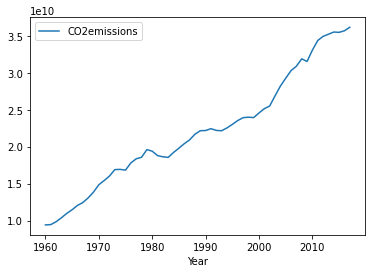

In [78]:
dataframe.plot.line(x='Year', y='CO2emissions')

Realizaremos un plot scatter para ver la tendencia de nuestros datos.

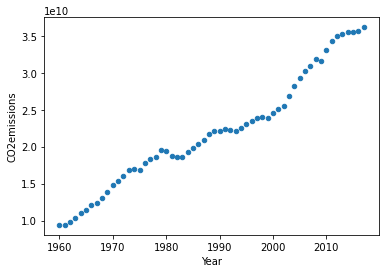

In [79]:
dataframe.plot.scatter(x='Year', y='CO2emissions')

Vemos cómo la emisión de CO2 ha aumentado al paso de los años y se podría ajustar a una recta. 

## *Conclusiones*

A través de este análisis nos fue posible entender mejor nuestra base de datos y de esta forma modificarla para facilitarnos su uso. 

A pesar de que aún será necesario realizar un análisis más profundo para poder cumplir con nuestro objetivo principal, después de revisar nuestros datos pudimos efectivamente responder algunos de nuestros objetivos secundarios. Entre ellos, pudimos identificar a los países que más emisiones de gases de efecto invernadero emiten, evaluándolos también a lo largo de cuatro años clave para el Protocolo de Kioto para así darnos una idea de la evolución que se dio gracias a este.

Además, revisamos a aquellos paises que menos emisiones realizan para observar los cambios que se dieron en estos en los últimos años esto dado a que ellos nunca estuvieron restringidos por el protocolo y nos interesaba conocer su evolución.
Por el momento las estrategias utilizadas para la elaboración de este trabajo son las mismas que se tenian contempladas.